#Projet Activités Frauduleuses

In [78]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [79]:
Ip=pd.read_csv('IpAddress_to_Country.csv')
user=pd.read_csv('Fraud_Data.csv')

In [80]:
Ip.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


In [81]:
user.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [82]:
idx = pd.IntervalIndex.from_arrays(Ip.lower_bound_ip_address, Ip.upper_bound_ip_address, closed = 'both')
country = Ip.iloc[idx.get_indexer(user.ip_address)]["country"]

user.country = country.values

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  after removing the cwd from sys.path.


In [83]:
user['country']=country.values

user.country

array(['Japan', 'United States', 'United States', ..., 'Japan',
       'United States', 'Australia'], dtype=object)

In [84]:
user

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,Australia
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States
...,...,...,...,...,...,...,...,...,...,...,...,...
151107,345170,2015-01-27 03:03:34,2015-03-29 00:30:47,43,XPSKTWGPWINLR,SEO,Chrome,M,28,3.451155e+09,1,United States
151108,274471,2015-05-15 17:43:29,2015-05-26 12:24:39,35,LYSFABUCPCGBA,SEO,Safari,M,32,2.439047e+09,0,Netherlands
151109,368416,2015-03-03 23:07:31,2015-05-20 07:07:47,40,MEQHCSJUBRBFE,SEO,IE,F,26,2.748471e+09,0,Japan
151110,207709,2015-07-09 20:06:07,2015-09-07 09:34:46,46,CMCXFGRHYSTVJ,SEO,Chrome,M,37,3.601175e+09,0,United States


In [85]:
cols = ['user_id', 'signup_time', 'purchase_time', 'purchase_value',
       'device_id', 'source', 'browser', 'sex', 'age', 'ip_address','country', 'class']
user = user[cols]

user.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,country,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,Japan,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,United States,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,United States,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,Australia,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,United States,0


In [86]:
user.country.shape

(151112,)

--------------

#Data Visualisation

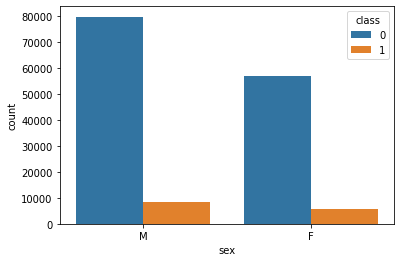

In [87]:
sns.countplot(x='sex', hue='class', data=user)

In [88]:
user['source'].describe()

count     151112
unique         3
top          SEO
freq       60615
Name: source, dtype: object

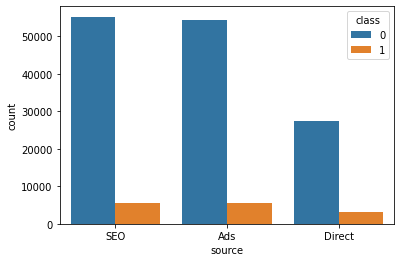

In [89]:
sns.countplot(x='source', hue='class', data=user)

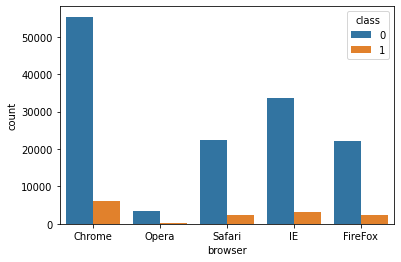

In [90]:
sns.countplot(x='browser', hue='class', data=user)

In [91]:
user.country.value_counts()/user.country.value_counts().sum()

United States                    0.384146
Australia                        0.157565
China                            0.079663
Japan                            0.048348
United Kingdom                   0.029713
                                   ...   
Cape Verde                       0.000007
Bonaire; Sint Eustatius; Saba    0.000007
Guadeloupe                       0.000007
Nauru                            0.000007
Burundi                          0.000007
Name: country, Length: 181, dtype: float64

In [92]:
user['signup_time'] = pd.to_datetime(user['signup_time'])
user['purchase_time'] = pd.to_datetime(user['purchase_time'])

In [93]:
user['diff_time'] = (user['purchase_time'] - user['signup_time'])/np.timedelta64(1, 's')

In [94]:
user.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,country,class,diff_time
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,Japan,0,4506682.0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,United States,0,17944.0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,United States,1,1.0
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,Australia,0,492085.0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,United States,0,4361461.0


In [95]:
user['signup_hour']=user['signup_time'].dt.hour
user['purchase_hour']=user['purchase_time'].dt.hour

In [96]:
user['purchase_dayofweek']=user['purchase_time'].dt.strftime('%A')

In [97]:
user['purchase_dayofweek'], key_dayofweek=user['purchase_dayofweek'].factorize(sort=True)

In [98]:
user.isnull().sum()

user_id               0
signup_time           0
purchase_time         0
purchase_value        0
device_id             0
source                0
browser               0
sex                   0
age                   0
ip_address            0
country               0
class                 0
diff_time             0
signup_hour           0
purchase_hour         0
purchase_dayofweek    0
dtype: int64

In [99]:
user['country'].describe()

count            151112
unique              181
top       United States
freq              58049
Name: country, dtype: object

In [100]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   user_id             151112 non-null  int64         
 1   signup_time         151112 non-null  datetime64[ns]
 2   purchase_time       151112 non-null  datetime64[ns]
 3   purchase_value      151112 non-null  int64         
 4   device_id           151112 non-null  object        
 5   source              151112 non-null  object        
 6   browser             151112 non-null  object        
 7   sex                 151112 non-null  object        
 8   age                 151112 non-null  int64         
 9   ip_address          151112 non-null  float64       
 10  country             151112 non-null  object        
 11  class               151112 non-null  int64         
 12  diff_time           151112 non-null  float64       
 13  signup_hour         151112 no

In [101]:
df_fraud=user.drop(columns="purchase_time")

In [102]:
df_fraud=df_fraud.drop(columns="ip_address")
df_fraud=df_fraud.drop(columns="signup_time")

In [103]:
df_fraud.head()

,user_id,purchase_value,device_id,source,browser,sex,age,country,class,diff_time,signup_hour,purchase_hour,purchase_dayofweek
0,22058,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,Japan,0,4506682.0,22,2,2
1,333320,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,United States,0,17944.0,20,1,1
2,1359,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,United States,1,1.0,18,18,4
3,150084,44,ATGTXKYKUDUQN,SEO,Safari,M,41,Australia,0,492085.0,21,13,1
4,221365,39,NAUITBZFJKHWW,Ads,Safari,M,45,United States,0,4361461.0,7,18,6


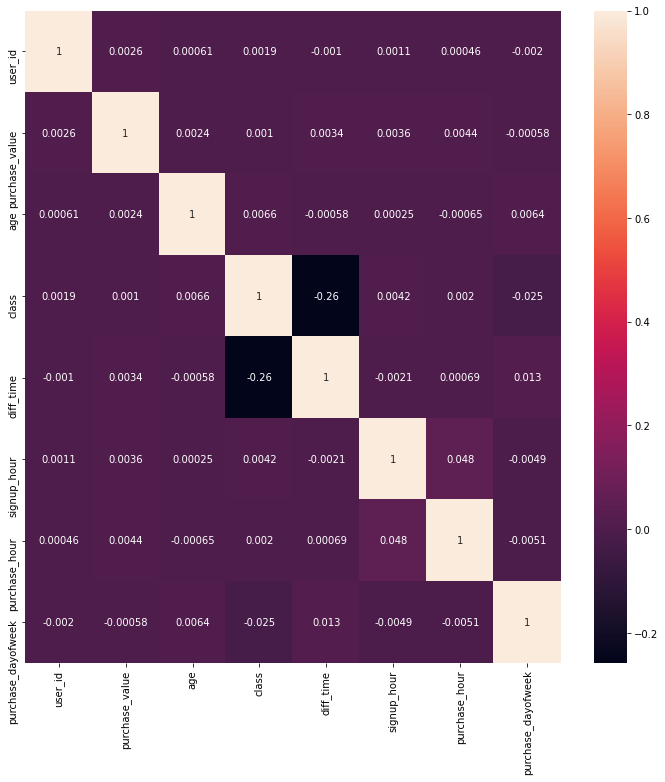

In [104]:
plt.figure(figsize=(12,12))
sns.heatmap(df_fraud.corr(),annot=True)

In [105]:
df_fraud.device_id.value_counts()

ZUSVMDEZRBDTX    20
NGQCKIADMZORL    20
ITUMJCKWEYNDD    20
CQTUVBYIWWWBC    20
EQYVNEGOFLAWK    20
                 ..
OQAUSYLGKEJHV     1
YIUPDXSYPRSQT     1
QOCNJNTKKIHMI     1
JXQNCYUHPDUOI     1
MGTQDAFVYKPDM     1
Name: device_id, Length: 137956, dtype: int64

-------

#Training data

In [106]:
df_fraud.head()

,user_id,purchase_value,device_id,source,browser,sex,age,country,class,diff_time,signup_hour,purchase_hour,purchase_dayofweek
0,22058,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,Japan,0,4506682.0,22,2,2
1,333320,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,United States,0,17944.0,20,1,1
2,1359,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,United States,1,1.0,18,18,4
3,150084,44,ATGTXKYKUDUQN,SEO,Safari,M,41,Australia,0,492085.0,21,13,1
4,221365,39,NAUITBZFJKHWW,Ads,Safari,M,45,United States,0,4361461.0,7,18,6


In [142]:
X=df_fraud.drop(['class'], axis=1)
y=df_fraud['class']

In [108]:
#X=pd.get_dummies(X, drop_first=True)

In [143]:
from sklearn import preprocessing
lb = preprocessing.LabelEncoder()
X['device_id'] = lb.fit_transform(X['device_id'])
X['source'] = lb.fit_transform(X['source'])
X['browser'] = lb.fit_transform(X['browser'])
X['sex'] = lb.fit_transform(X['sex'])
X['country'] = lb.fit_transform(X['country'])

In [144]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test= train_test_split(X,y, test_size=0.3)

In [111]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier(class_weight='balanced')
rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [112]:
rf_clf.score(X_train, y_train)

0.9999243699067859

In [113]:
rf_clf.score(X_test, y_test)

0.956500639696475

In [114]:
y_pred_rf = rf_clf.predict(X_test)

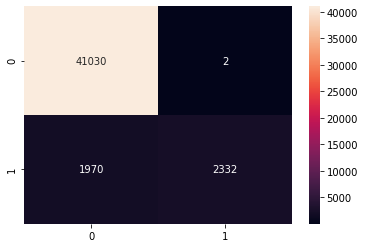

In [115]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt="d")

In [116]:
rf_clf.feature_importances_

array([0.09011909, 0.07381654, 0.09373018, 0.01322372, 0.02281963,
       0.01135716, 0.06426292, 0.04220935, 0.43237   , 0.05907394,
       0.06510373, 0.03191374])

In [117]:
len(rf_clf.feature_importances_)

12

In [118]:
len(X.columns)

12

In [119]:
feature_importance = pd.DataFrame({"features": X.columns[:], "score": rf_clf.feature_importances_}).sort_values(by="score", ascending=False)
feature_importance

,features,score
8,diff_time,0.432370
2,device_id,0.093730
0,user_id,0.090119
1,purchase_value,0.073817
10,purchase_hour,0.065104
6,age,0.064263
9,signup_hour,0.059074
7,country,0.042209
11,purchase_dayofweek,0.031914
4,browser,0.022820


In [120]:
from sklearn.metrics import classification_report, roc_curve, auc
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98     41032
           1       1.00      0.54      0.70      4302

    accuracy                           0.96     45334
   macro avg       0.98      0.77      0.84     45334
weighted avg       0.96      0.96      0.95     45334



In [121]:
from sklearn.model_selection import GridSearchCV
rf_classifier_grid = RandomForestClassifier()
params = {"n_estimators": range(10, 17, 1),
          "max_depth" : range(1,5),
          "max_features" : range(1,5)
          }

classifier = GridSearchCV(cv=10, estimator = rf_classifier_grid, param_grid = params, n_jobs=-1, verbose=3).fit(X_train, y_train)

Fitting 10 folds for each of 112 candidates, totalling 1120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:   27.9s
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 508 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 1120 out of 1120 | elapsed:  8.1min finished


In [122]:
classifier.best_params_

{'max_depth': 3, 'max_features': 4, 'n_estimators': 16}

In [123]:
classifier.best_estimator_.score(X_train, y_train)

0.9557563954697574

In [124]:
classifier.best_estimator_.score(X_test, y_test)

0.9556182997308863

In [125]:
feature_importance2 = pd.DataFrame({"features": X.columns[:], "score": classifier.best_estimator_.feature_importances_}).sort_values(by="score", ascending=False)
feature_importance2

,features,score
8,diff_time,0.929441
10,purchase_hour,0.052741
11,purchase_dayofweek,0.006999
2,device_id,0.005361
4,browser,0.001970
9,signup_hour,0.001479
6,age,0.000883
1,purchase_value,0.000360
3,source,0.000359
7,country,0.000285


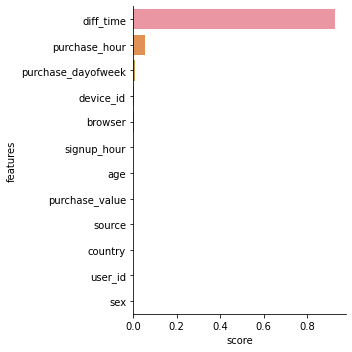

In [126]:
sns.catplot(x="score",y="features", data=feature_importance2, kind="bar" )

In [127]:
df_fraud.purchase_dayofweek.value_counts()

3    22015
1    21711
2    21648
4    21586
0    21522
6    21316
5    21314
Name: purchase_dayofweek, dtype: int64

-------------------------

In [128]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test) ### PAS de fit sur le X_test

In [129]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(learning_rate=0.5,n_estimators=40)
gbr.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.5, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=40,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [130]:
gbr.score(X_test,y_test)

0.5146076193975728

In [131]:
from sklearn.ensemble import BaggingRegressor
bagging_regressor = BaggingRegressor(n_estimators=40)
bagging_regressor.fit(X_train, y_train)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=40,
                 n_jobs=None, oob_score=False, random_state=None, verbose=0,
                 warm_start=False)

In [132]:
bagging_regressor.score(X_test,y_test)

0.4892857523298366

In [133]:
!pip install xgboost
from xgboost import XGBRegressor
regressor_xgb = XGBRegressor()
regressor_xgb.fit(X_train, y_train)
regressor_xgb.score(X_test, y_test)

[23:07:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.5169901651783204

In [134]:
y_pred_xgb = regressor_xgb.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm, annot=True, fmt="d")

In [152]:
import xgboost as xgb
xgb_class = xgb.XGBClassifier(random_state=42)
xgb_class.fit(
    X_train,
    y_train,
)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [153]:
xgb_class.score(X_test,y_test)

0.9568756341818503

In [151]:
print(X_test.shape, X_train.shape)

(45334, 12) (105778, 12)


In [156]:
y_pred_xgb_class = xgb_class.predict(X_test)

In [ ]:
y_test.shape

In [157]:
from sklearn.metrics import classification_report, roc_curve, auc
print(classification_report(y_test, y_pred_xgb_class))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98     41170
           1       1.00      0.53      0.69      4164

    accuracy                           0.96     45334
   macro avg       0.98      0.77      0.84     45334
weighted avg       0.96      0.96      0.95     45334



In [141]:
feature_importance3 = pd.DataFrame({"features": X.columns[:], "score": regressor_xgb.feature_importances_}).sort_values(by="score", ascending=False)
feature_importance3

,features,score
8,diff_time,0.970823
11,purchase_dayofweek,0.005254
0,user_id,0.003607
3,source,0.003520
9,signup_hour,0.003085
1,purchase_value,0.002551
5,sex,0.002496
2,device_id,0.002406
6,age,0.002006
10,purchase_hour,0.001538


In [159]:
from sklearn.metrics import accuracy_score
# evaluate predictions
accuracy = accuracy_score(y_test, y_pred_xgb_class)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 95.69%


In [161]:
# Evaluate every algorithms to find out the best one
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold=KFold(n_splits=10,shuffle=True, random_state=0)

In [163]:
score_rf=cross_val_score(rf_clf, X_train, y_train, cv=k_fold, n_jobs=1, scoring='roc_auc')
print(np.mean(score_rf)*100,2)

77.22880620124678 2


In [164]:
score_xgb_class=cross_val_score(xgb_class, X_train, y_train, cv=k_fold, n_jobs=1, scoring='roc_auc')
print(np.mean(score_xgb_class)*100,2)

77.67319151639785 2


In [165]:

# Find the auc of every model and plot it
from sklearn.metrics import roc_curve, auc


y_pred_rf=rf_clf.predict(X_test)
y_pred_prob_rf=rf_clf.predict_proba(X_test)
fpr_rf, tpr_rf, thresholds_rf= roc_curve(y_test, y_pred_prob_rf[:,1])
auc_rf=auc(fpr_rf, tpr_rf)

y_pred_xgb_class=xgb_class.predict(X_test)
y_pred_prob_xgb=xgb_class.predict_proba(X_test)
fpr_xgb, tpr_xgb, thresholds_xgb= roc_curve(y_test, y_pred_prob_xgb[:,1])
auc_xgb=auc(fpr_xgb, tpr_xgb)



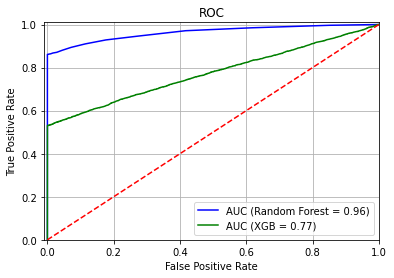

In [168]:

# Plot the ROC of each model, we also see the ROC is the best model from the graph
plt.title('ROC')
plt.plot(fpr_rf, tpr_rf,'b', label='AUC (Random Forest = %0.2f)' % auc_rf)
plt.plot(fpr_xgb, tpr_xgb,'g', label='AUC (XGB = %0.2f)' % auc_xgb)
plt.legend()
plt.grid()
plt.plot([0.0, 1.0],[0.0, 1.0],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()